<a href="https://colab.research.google.com/github/StalinD10/Modelo-ScrapyData/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas seaborn matplotlib scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

In [4]:
url = '../empresasPorIngreso.csv'
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,Rank,Nombre,Industria,Ingresos,Beneficios,Empleados,Sede,Año,Ref
0,0,Millones de USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Walmart,Comercio minorista,"572,754","13,940","2,300,000",Estados Unidos,2021.0,[1]
2,2,2,Amazon,Comercio electrónico,"469,822","33,364","1,608,000",Estados Unidos,2021.0,[2]
3,3,3,Sinopec,Petróleo,"424,812","16,920","553,833",China China,2021.0,[3]
4,4,4,State Grid,Electricidad,"386,617","5,580","1,566,000",China China,2020.0,NaN


In [5]:

#Eliminar la primera fila
data = data.drop(data.index[0])
# Visualizamos el DataFrame
data

,Unnamed: 0,Rank,Nombre,Industria,Ingresos,Beneficios,Empleados,Sede,Año,Ref
1,1,1,Walmart,Comercio minorista,"572,754","13,940","2,300,000",Estados Unidos,2021.0,[1]
2,2,2,Amazon,Comercio electrónico,"469,822","33,364","1,608,000",Estados Unidos,2021.0,[2]
3,3,3,Sinopec,Petróleo,"424,812","16,920","553,833",China China,2021.0,[3]
4,4,4,State Grid,Electricidad,"386,617","5,580","1,566,000",China China,2020.0,NaN
5,5,5,Apple,Electrónica de consumo,"365,820","94,680","154,000",Estados Unidos,2021.0,[4]
6,6,6,Saudi Aramco,Petróleo,"359,181","109,972","79,800",Arabia Saudita Arabia Saudita,2021.0,[5]
7,7,7,Volkswagen,Automotriz,"295,745","22,784","662,575",Alemania Alemania,2021.0,[6]
8,8,8,CVS Health,Asistencia sanitaria,"291,935","7,910","256,500",Estados Unidos,2021.0,[7]
9,9,9,UnitedHealth Group,Asistencia sanitaria,"287,597","17,285","330,000",Estados Unidos,2021.0,[8]
10,10,10,ExxonMobil,Petróleo,"285,640","23,040","72,000",Estados Unidos,2021.0,[9]


In [7]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[8]],axis = 1)
data

,Rank,Nombre,Industria,Ingresos,Beneficios,Empleados,Sede,Año
1,1,Walmart,Comercio minorista,"572,754","13,940","2,300,000",Estados Unidos,2021.0
2,2,Amazon,Comercio electrónico,"469,822","33,364","1,608,000",Estados Unidos,2021.0
3,3,Sinopec,Petróleo,"424,812","16,920","553,833",China China,2021.0
4,4,State Grid,Electricidad,"386,617","5,580","1,566,000",China China,2020.0
5,5,Apple,Electrónica de consumo,"365,820","94,680","154,000",Estados Unidos,2021.0
6,6,Saudi Aramco,Petróleo,"359,181","109,972","79,800",Arabia Saudita Arabia Saudita,2021.0
7,7,Volkswagen,Automotriz,"295,745","22,784","662,575",Alemania Alemania,2021.0
8,8,CVS Health,Asistencia sanitaria,"291,935","7,910","256,500",Estados Unidos,2021.0
9,9,UnitedHealth Group,Asistencia sanitaria,"287,597","17,285","330,000",Estados Unidos,2021.0
10,10,ExxonMobil,Petróleo,"285,640","23,040","72,000",Estados Unidos,2021.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 1 to 35
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        35 non-null     object 
 1   Nombre      35 non-null     object 
 2   Industria   35 non-null     object 
 3   Ingresos    35 non-null     float64
 4   Beneficios  35 non-null     float64
 5   Empleados   35 non-null     float64
 6   Sede        35 non-null     object 
 7   Año         35 non-null     float64
dtypes: float64(4), object(4)
memory usage: 2.3+ KB


In [10]:
# Función para convertir y eliminar comas
def convert_to_float(val):
    try:
        return float(val.replace(',', ''))
    except ValueError:
        return val

# Aplicar la función a las columnas específicas
data['Ingresos'] = data['Ingresos'].apply(convert_to_float)
data['Beneficios'] = data['Beneficios'].apply(convert_to_float)
data['Empleados'] = data['Empleados'].apply(convert_to_float)

In [11]:
data.describe()

,Ingresos,Beneficios,Empleados,Año
count,35.000000,35.000000,3.500000e+01,35.000000
mean,254992.057143,25555.885714,4.219639e+05,2020.771429
std,97073.680884,28636.260743,5.125219e+05,0.426043
min,144589.000000,611.000000,8.619000e+03,2020.000000
25%,178436.000000,4990.500000,8.741100e+04,2021.000000
50%,234425.000000,17285.000000,2.880000e+05,2021.000000
75%,286618.500000,33862.000000,4.068005e+05,2021.000000
max,572754.000000,109972.000000,2.300000e+06,2021.000000


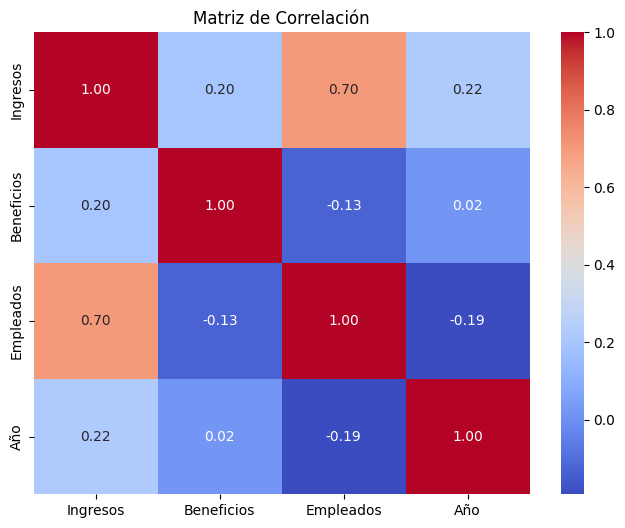

In [15]:
#Matriz de correlacion
#Seleccionar solo las columnas numéricas para la matriz de correlación
data_numeric = data[['Ingresos', 'Beneficios', 'Empleados', 'Año']]

# Calcular la matriz de correlación
correlation_matrix = data_numeric.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

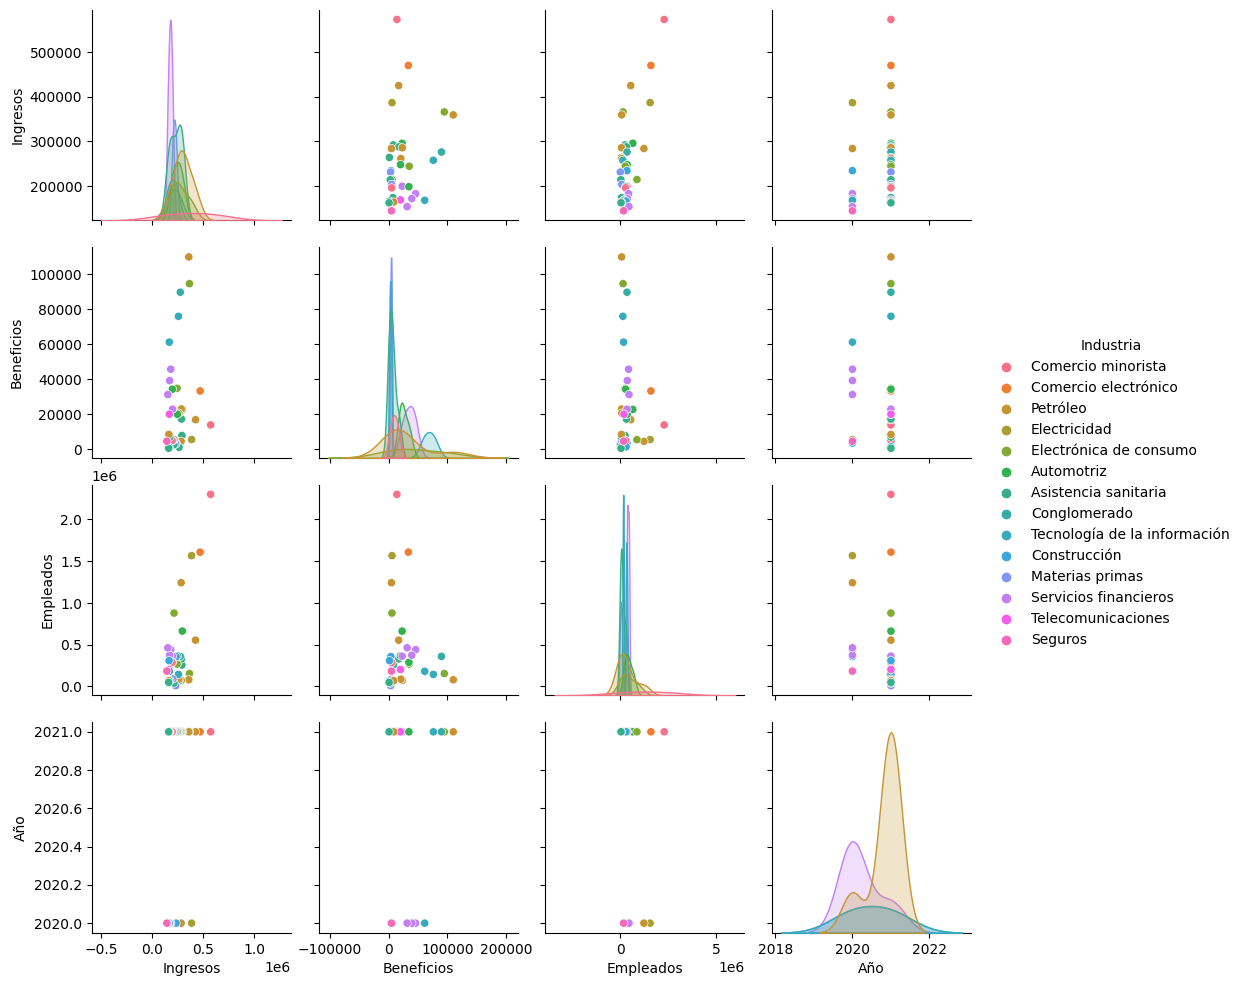

In [23]:
# Grafica de correlaciones respecto a las industrias
sns.pairplot(data,hue="Industria")


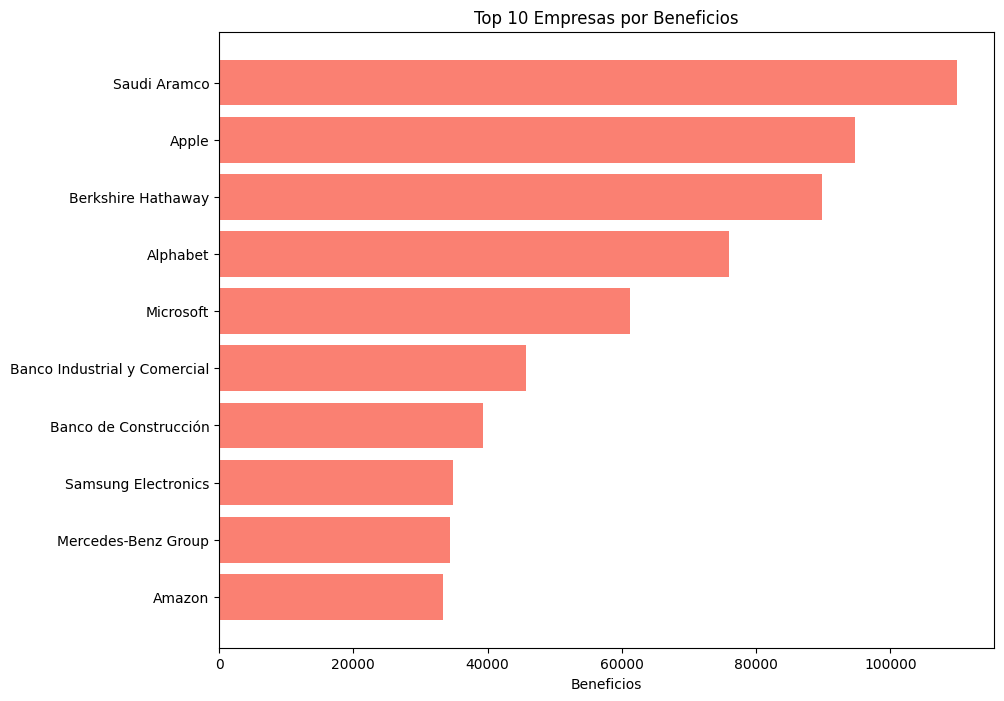

In [13]:
 #Ordenar los datos por beneficios y seleccionar las 10 primeras empresas
top_10_beneficios = data.sort_values('Beneficios', ascending=False).head(10)

# Gráfico de barras para las 10 empresas con mayores beneficios
plt.figure(figsize=(10, 8))
plt.barh(top_10_beneficios['Nombre'], top_10_beneficios['Beneficios'], color='salmon')
plt.xlabel('Beneficios')
plt.title('Top 10 Empresas por Beneficios')
plt.gca().invert_yaxis()
plt.show()

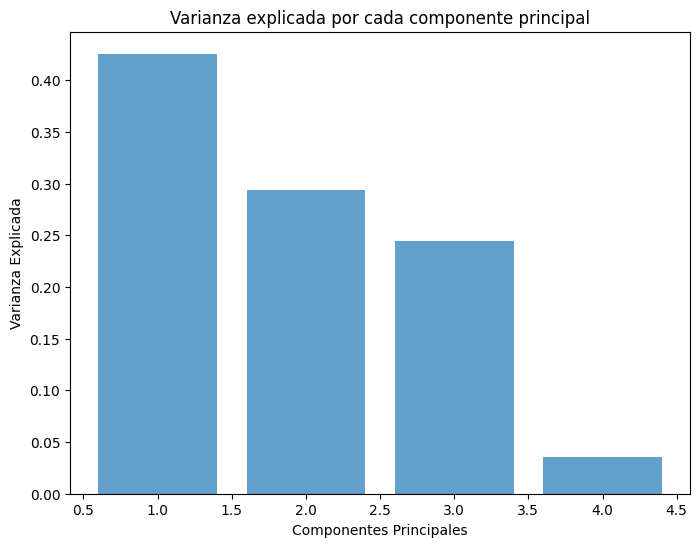

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Separar las variables numéricas
numeric_data = data[['Ingresos', 'Beneficios', 'Empleados', 'Año']]

# Escalar los datos para normalizarlos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Aplicar PCA
pca = PCA()
pca.fit(scaled_data)


# Obtener las componentes principales
components = pca.components_

# Graficar la varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza explicada por cada componente principal')
plt.show()